In [1]:
cd ../../task_01/pipelines

/Users/pldelacour/Documents/PL_Ecole/data_sc_lab/data_sc_lab/task_01/pipelines


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipynb.fs.full.tool_functions import *
from yellowbrick.regressor import AlphaSelection
from  sklearn.metrics import mean_squared_error

/Users/pldelacour/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [3]:
df_beha = pd.read_csv('../../../data/Behavioral/AllData.csv')#, nrows=1000)

df_psd_cluster = pd.read_csv("../../../data/EEG/RestingEEG_PSD_Cluster.csv") #, nrows=1000)
df_psd_channel = pd.read_csv("../../../data/EEG/RestingEEG_PSD_Channel.csv") #, nrows=5)
df_spectro_cluster = pd.read_csv("../../../data/EEG/RestingEEG_Spectro_Cluster.csv") #, nrows=1000)
df_spectro_channel = pd.read_csv("../../../data/EEG/RestingEEG_Spectro_Channel.csv") #, nrows=5)

df_microstate = pd.read_csv("../../../data/EEG/RestingEEG_Microstates.csv") #, nrows=5)

/Users/pldelacour/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (66,68,80,81,82,83,84,95,96,97,98,99,110,111,112,113,114,125,126,127,128,129,140,141,142,144,155,156,157,159,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,11

In [4]:
disease = df_beha['DX_01'].unique()
y_labels = df_beha[["Patient_ID", "Age", "DX_01"]]
aut_bin = (df_beha['DX_01'].str.contains("Autism Spectrum Disorder") == True)*1.0
#df_beha['autism'] = aut_bin

0

In [6]:
df_tot = 

# autism =  164
# of non autism = 1932


In [111]:
# Extract relevant info from the Behavioral data 
#y_labels = df_beha[["Patient_ID", "Age", "autism"]]


In [146]:
df_beha.pivot_table(index=['DX_01'], aggfunc='size')

DX_01
                                                                         2
ADHD-Combined Type                                                     387
ADHD-Hyperactive/Impulsive Type                                         49
ADHD-Inattentive Type                                                  295
Acute Stress Disorder                                                    2
Adjustment Disorders                                                    16
Agoraphobia                                                              1
Autism Spectrum Disorder                                               164
Bipolar I Disorder                                                       3
Bipolar II Disorder                                                      3
Borderline Intellectual Functioning                                      7
Cannabis Use Disorder                                                    1
Delirium due to another medical condition                                1
Disruptive Mood Dys

In [85]:
ind = df_beha.pivot_table(index=['DX_01'], aggfunc='size')>=50
size = df_beha.pivot_table(index=['DX_01'], aggfunc='size')[ind.values]
size

DX_01
ADHD-Combined Type                                          387
ADHD-Inattentive Type                                       295
Autism Spectrum Disorder                                    164
Generalized Anxiety Disorder                                 70
Major Depressive Disorder                                    60
No Diagnosis Given                                          235
No Diagnosis Given: Incomplete Eval                         278
Other Specified Attention-Deficit/Hyperactivity Disorder     53
Social Anxiety (Social Phobia)                               51
Specific Learning Disorder with Impairment in Reading        97
dtype: int64

In [107]:
#Taking only disease with more than 50 samples.
ind = df_beha.pivot_table(index=['DX_01'], aggfunc='size')>=50
ds = np.array(ind[ind.values].index)
#print(ds)
ds = ['No Diagnosis Given' , 'ADHD-Inattentive Type',
     'Autism Spectrum Disorder' , 'Generalized Anxiety Disorder',
        'Major Depressive Disorder' , 'Other Specified Attention-Deficit/Hyperactivity Disorder',
     'Social Anxiety' , 'Specific Learning Disorder with Impairment in Reading']
ds_map = { i:x for i,x in enumerate(ds)}

ds_map

{0: 'No Diagnosis Given',
 1: 'ADHD-Inattentive Type',
 2: 'Autism Spectrum Disorder',
 3: 'Generalized Anxiety Disorder',
 4: 'Major Depressive Disorder',
 5: 'Other Specified Attention-Deficit/Hyperactivity Disorder',
 6: 'Social Anxiety',
 7: 'Specific Learning Disorder with Impairment in Reading'}

In [108]:
len(ds)

8

In [109]:
y_labels = df_beha[["Patient_ID", "Age", "DX_01" ]]

y = 100*np.ones(len(y_labels["DX_01"]))
for i in range(len(ds)):
    ind = (y_labels["DX_01"].str.contains(ds_map[i]) == True)
    y[ind] = i
    


for i in range(8) : 
    print(ds_map[i] , np.sum(y==i))
size

No Diagnosis Given 513
ADHD-Inattentive Type 295
Autism Spectrum Disorder 164
Generalized Anxiety Disorder 70
Major Depressive Disorder 60
Other Specified Attention-Deficit/Hyperactivity Disorder 53
Social Anxiety 51
Specific Learning Disorder with Impairment in Reading 98


DX_01
ADHD-Combined Type                                          387
ADHD-Inattentive Type                                       295
Autism Spectrum Disorder                                    164
Generalized Anxiety Disorder                                 70
Major Depressive Disorder                                    60
No Diagnosis Given                                          235
No Diagnosis Given: Incomplete Eval                         278
Other Specified Attention-Deficit/Hyperactivity Disorder     53
Social Anxiety (Social Phobia)                               51
Specific Learning Disorder with Impairment in Reading        97
dtype: int64

In [148]:
253+278
#len(y)

531

In [139]:
#ADHD Type :
#-ADHD-Inattentive Type
#-ADHD-Hyperactive/Impulsive Type
#-ADHD-Combined Type

y_labels = df_beha[["Patient_ID", "Age", "DX_01" ]]

y = 100*np.ones(len(y_labels["DX_01"]))
for i in range(len(ds)):
    ind = (y_labels["DX_01"].str.contains(ds_map[i]) == True)
    y[ind] = i

disease = df_beha['DX_01'].unique()
df_dis = df_beha[["Patient_ID", "Age"]]
df_dis['disease'] = y

df_spectro_cluster.rename(columns={'id': 'Patient_ID'}, inplace=True)
# Aggregate with label
df_dis_spectro = pd.merge(df_dis, df_spectro_cluster, on='Patient_ID')
#Replace NAN
df_dis_spectro = fill_with_median(df_dis_spectro)


X = df_dis_spectro.drop(['Patient_ID', 'disease'], axis=1)
y =  df_dis_spectro[['disease']]

#X = np.array(X)

#Scaling features  
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)
X = np.array(X)
y = np.array(y)

/Users/pldelacour/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


## PCA of All disease 

In [150]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA

In [141]:
ds_map.keys()
target_names = []
for i in ds_map.values() :
    target_names.append(i)
target_names

['No Diagnosis Given',
 'ADHD-Inattentive Type',
 'Autism Spectrum Disorder',
 'Generalized Anxiety Disorder',
 'Major Depressive Disorder',
 'Other Specified Attention-Deficit/Hyperactivity Disorder',
 'Social Anxiety',
 'Specific Learning Disorder with Impairment in Reading']

/Users/pldelacour/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


<function matplotlib.pyplot.show(*args, **kw)>

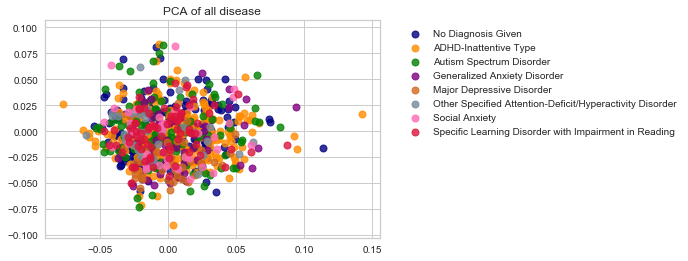

In [152]:
#pca = PCA(n_components=2)
#X_r = pca.fit(X).transform(X)

pca = FastICA(n_components=2)
X_r = pca.fit(X).transform(X)


#print(X_r)
#print(X_r.shape)

target_names = []
for i in ds_map.values() :
    target_names.append(i)

keys = []
for i in ds_map.keys() :
    keys.append(i)

    
# Percentage of variance explained for each components
#print('explained variance ratio (first two components): %s'
#      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'darkorange' , 'green' , 'purple', 'chocolate' , 'lightslategrey'  , 'hotpink' , 'crimson']
lw = 1

for color, i, target_name in zip(colors, keys, target_names):
    ##
    #print(color, i , target_name)
    #X_r[y == i, 0]
    ##
    plt.scatter(X_r[(y==i).flatten(), 0], X_r[(y==i).flatten(), 1], color=color, alpha=.8, lw=lw,
                label=target_name)
#plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('PCA of all disease')


plt.show
#plt.savefig('Autism_normal_.png')